In [ ]:
'''In this method, subarrays frequencies have been used instead of uniform length extraction.'''

'In this method, subarrays frequencies have been used instead of uniform length extraction.'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import numpy as np 
import random
import math
import matplotlib.pyplot as plt
import re

In [12]:
with open('transcript.txt') as f:
    text3 = f.read()

In [13]:
string = text3.replace(",","")
text3=string.split('|')

string=''
for i in range(1,len(text3),3):
  string+=text3[i]

string=string.lower()

In [14]:
type(string)

str

In [15]:
string=re.sub(r'[^\w]', ' ', string)

In [16]:
primi=string.split()

In [17]:
string=''
c=0
l=[]
primi_fre={}
for i in range(len(primi)):
  if len(string)>10000:
    break
  string+=primi[i]
  c+=len(primi[i])
  l.append(primi[i])
  try:
    primi_fre[primi[i]]+=1
  except:
    primi_fre[primi[i]]=1

primi=list(set(l))

In [18]:
len(string)

10005

In [19]:
c=0
for i in primi_fre.keys():
  if primi_fre[i]>1:
    c+=1
print(c/len(primi_fre))

0.24333333333333335


In [20]:
def entropy(arr):
    s=0
    for i in arr:
      if i!=0:
        s+=-i/sum(arr)*math.log2(i/sum(arr))
    return s

In [ ]:
def subarray(string):
  f = open("/content/drive/MyDrive/Project/sp_subwei.txt","w+")
  c=0
  string=string.lower()
  l=[]
  for i in range(len(string)):
    for j in range(2,min(15,len(string)-i+1)):                #Length 50 has been taken
      try:
        f.writelines(str(string[i:i+j]).replace('0','*')+'\n')
        c+=1
      except:
        pass
  f.close()
subarray(string)                         #Substrings generated and stored in a file

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project/sp_subwei.txt",names=['a'])
df.to_csv('/content/drive/MyDrive/Project/sp_subwei.csv')

In [ ]:
del df

In [ ]:
x=pd.read_csv('/content/drive/MyDrive/Project/sp_subwei.csv',names=['a']) 
x['new'] = x.a.str[1:-1]
x['front'] = x.a.str[0]
x['back'] = x.a.str[-1]

counter={}
le=len(x['new'].unique())
c=1
f=open('/content/drive/MyDrive/Project/sp_wei.txt','w+')
for i in set(x['new']):
    print(c,'/',le)
    c+=1
    d=x[x['new']==i]
    entf=entropy(d.groupby('front').count()['a'])
    entb=entropy(d.groupby('back').count()['a'])
    y=((min(len(d['front'].unique()),len(d['back'].unique()))))   #The count of different types of characters are noted
    y=min(entf,entb)
    f.writelines(str(i)+' '+str(y)+'_'+str(len(d))+'\n')
f.close()

del x

Streaming output truncated to the last 5000 lines.
77402 / 82401
77403 / 82401
77404 / 82401
77405 / 82401
77406 / 82401
77407 / 82401
77408 / 82401
77409 / 82401
77410 / 82401
77411 / 82401
77412 / 82401
77413 / 82401
77414 / 82401
77415 / 82401
77416 / 82401
77417 / 82401
77418 / 82401
77419 / 82401
77420 / 82401
77421 / 82401
77422 / 82401
77423 / 82401
77424 / 82401
77425 / 82401
77426 / 82401
77427 / 82401
77428 / 82401
77429 / 82401
77430 / 82401
77431 / 82401
77432 / 82401
77433 / 82401
77434 / 82401
77435 / 82401
77436 / 82401
77437 / 82401
77438 / 82401
77439 / 82401
77440 / 82401
77441 / 82401
77442 / 82401
77443 / 82401
77444 / 82401
77445 / 82401
77446 / 82401
77447 / 82401
77448 / 82401
77449 / 82401
77450 / 82401
77451 / 82401
77452 / 82401
77453 / 82401
77454 / 82401
77455 / 82401
77456 / 82401
77457 / 82401
77458 / 82401
77459 / 82401
77460 / 82401
77461 / 82401
77462 / 82401
77463 / 82401
77464 / 82401
77465 / 82401
77466 / 82401
77467 / 82401
77468 / 82401
77469 / 824

In [21]:
c=pd.read_csv('/content/drive/MyDrive/Project/sp_wei.txt') #TXT to CSV converter
c.to_csv('/content/drive/MyDrive/Project/sp_wei.csv')
c=pd.read_csv('/content/drive/MyDrive/Project/sp_wei.csv',names=['a'])

In [22]:
c

,a
NaN,4.159436231503398_10005
0.0,nan 0_0
1.0,emilanesesf 0.0_1
2.0,esycu 0.0_1
3.0,delosarti 0.0_1
...,...
82395.0,latrist 0.0_1
82396.0,slosco 0.0_1
82397.0,mientoi 0.0_1
82398.0,losalmace 0.0_1


In [23]:
d={}
yt=''
yt1='-1_-1'
for i in c['a']:
  i=str(i)
  for j in range(len(i)-1,0,-1):
    if i[j]==' ':
      yt=i[:j]
      yt1=i[-len(i)+j+1:]
      break
  try:
    d[yt]=[float(i) for i in yt1.split('_')]
  except:
    pass

import collections 
d = collections.OrderedDict(sorted(d.items()))

For each Subarray the corresponding Variety of Preceding or Succeding characters is noted

---



In [24]:
#Print sample Dictionary with elements as entropy and frequency

for i in range(10):
  print(list(d.items())[i])

('', [-1.0, -1.0])
('a', [4.050478262209876, 1266.0])
('aa', [3.3469901985134145, 36.0])
('aaa', [0.0, 1.0])
('aaan', [0.0, 1.0])
('aaand', [0.0, 1.0])
('aaanda', [0.0, 1.0])
('aaandal', [0.0, 1.0])
('aaandalu', [0.0, 1.0])
('aaandaluc', [0.0, 1.0])


### Building the Tree

In [25]:
fre={}
for i in d.keys():
  fre[i]=d[i][1]

In [26]:
ent={}
for i in d.keys():
  ent[i]=d[i][0]

In [27]:
relative_ent={}
relative_fre={}
for i in ent.keys():
  if ent[i]!=0 and len(i)!=0:
    try:
      relative_ent[len(i)].append(ent[i]*fre[i])
      relative_fre[len(i)]+=fre[i]
    except:
      relative_ent[len(i)]=[ent[i]*fre[i]]
      relative_fre[len(i)]=fre[i]

relative={}
for i in relative_ent.keys():
  relative[i]=sum(relative_ent[i])/relative_fre[i]

new_ent={}
for i in ent.keys():
  if len(i)!=0:
    new_ent[i]=ent[i]/relative[len(i)]

In [28]:
class tree(object):
    def __init__(self, char: str):
        self.char = char
        self.children = []
        self.entropy = 1
        self.freq=0

In [29]:
def add(root, word,variation,frequency):
    node = root
    for char in word:
        found_in_child = False
        # Search for the character in the children of the present `node`
        for child in node.children:
            if child.char == char:
              node = child
              found_in_child = True
              break
        # We did not find it so add a new chlid
        if not found_in_child:
          new_node = tree(char)
          node.children.append(new_node)
          # And then point node to the new child
          node = new_node
    node.entropy=variation
    node.freq=frequency

In [30]:
def primitives(d):
  root = tree('*')
  for i in d.keys():
    add(root,i,d[i][0],d[i][1])
  return root

root=primitives(d)
root.counter=-1  

In [31]:
root

In [32]:
def print_tree(root,s,final,prev_c,length):
  s+=root.char
  if root.entropy>prev_c:
    final.append(s[1:])

  if root.children==[]:
    s=''
    length=0
    return 0 
  for child in root.children:
    print_tree(child,s,final,root.entropy,length+1)

m=[]
n=[]
print_tree(root,'',m,100,0)
m=list(set(m))

In [ ]:
len(m)

1173

In [ ]:
mores=[]
for i in primi_fre.keys():
  if primi_fre[i]>1:
    mores.append(i)

c=0
for i in m:
  if i in mores:
    c+=1
print(c/len(mores))

0.5342465753424658


In [33]:
def ent_string(word,string):
  f={}
  b={}
  for i in range(len(string)):
    if string[i:i+len(word)]==word:
      if i>0:
        try:
          f[string[i-1]]+=1
        except:
          f[string[i-1]]=1
      if i+len(word)<len(string):
        try:
          b[string[i+len(word)]]+=1
        except:
          b[string[i+len(word)]]=1
  return min(entropy(list(f.values())),entropy(list(b.values())))

In [34]:
def residue(k,string):
    x=0
    d={}
    e={}
    k=sorted(k,reverse=True)
    i=0
    c=0
    while i<len(string):
        t=0
        for j in k:
            if string[i:len(j)+i]==j:
                t=1
                i=i+len(j)
                break
        if t==0:
            i=i+1
            c=c+1
    
    return(c/len(string))

In [35]:
def guide(k,string):
    x=0
    d={}
    e={}
    k=sorted(k,key=len,reverse=True)
    i=0
    c=0
    while i<len(string):
        t=0
        for j in k:
            if string[i:len(j)+i]==j:
                t=1
                try:
                    d[len(j)]+=1
                except:
                    d[len(j)]=1
                try:
                    e[j]+=1
                except:
                    e[j]=1
                i=i+len(j)
                break
        if t==0:
            i=i+1
            c=c+1
    
    
    for i in d.keys():
        x+=d[i]*i
    
    try:
        return [c/len(string),sum(d.values())/x+2*math.ceil(math.log2(len(e)))*sum(e.values())/len(string)]
    except:
        return [c/len(string),-1]

In [36]:
#Remove all zero entropy elements

#Replace the original with new and check

def zero_ent(m,ent):
  g=[]
  c=0
  for i in m:
    c+=1
    if ent[i]==0 and fre[i]>1:
      for j in m:
        if j+i in ent.keys() and i+j in ent.keys() and ent[i+j]>ent[j+i] and ent[j+i]>0:
          g.append(i+j)
        elif j+i in ent.keys() and i+j in ent.keys() and ent[j+i]>ent[i+j] and ent[i+j]>0:
          g.append(j+i)
        elif j+i in fre.keys() and ent[j+i]==0 and fre[j+i]>1:
          g.append(j+i)
        elif i+j in fre.keys() and ent[i+j]==0 and fre[i+j]>1:
          g.append(i+j)
    else:
      g.append(i)
  return list(set(g))


g_prev=m
g=zero_ent(g_prev,ent)
while set(g_prev)-set(g).intersection(set(g_prev))!=set():
  g_prev=g
  g=zero_ent(g_prev,ent)

In [37]:
print(guide(g,string))

[0.0, 7.738830584707646]


In [38]:
#Check if there is any left for handling 0 entropy combination

for i in g:
  if i in ent.keys() and ent[i]==0 and fre[i]>1:
    print('*')

###Split Function

In [39]:
#Split the existing elements based on 3 conditions:
#Entropy of either child is greater than its parents
#Frequency of both children is greater than the parent
#Difference in entropy of 2 children should be maximum

def split_primitives(word,fre,ent,string):

  if ent[word]==0 and fre[word]>1:
    return -1,-1

  diff=0
  
  diff_max=0
  index=-1
  for i in range(1,len(word)-1):
    if ent[word[:i]]>ent[word] or ent[word[i:]]>ent[word] and min(ent[word[:i]],ent[word[i:]])!=0:
      if fre[word[:i]]>=fre[word] and fre[word[i:]]>=fre[word]:
        diff=abs(ent[word[:i]]+ent[word[i:]]-ent[word])
        if diff>diff_max:
          index=i
          diff_max=diff
  if index!=-1:
    i=index
    return word[:i],word[i:]
  else:
    return -1,-1

In [ ]:
#Implementing the split function

m=[]
for i in g:
  e,f=split_primitives(i,fre,ent,string)
  if e==-1:
    m.append(i)
    pass
  else:
    m.append(e)
    m.append(f)

In [ ]:
print(guide(m,string))

[0.0, 7.707346326836582]


In [ ]:
mores=[]
for i in primi_fre.keys():
  if primi_fre[i]>1:
    mores.append(i)

c=0
for i in set(m):
  if i in mores:
    c+=1
print(c/len(mores))

0.502283105022831


In [ ]:
f=open('/content/drive/MyDrive/Project/sp_words.txt','w+')
for i in m:
  f.writelines(i+'\n')
f.close()

c=pd.read_csv('/content/drive/MyDrive/Project/sp_words.txt',names=['List']) 
m=list(c['List'])

In [ ]:
c=pd.read_csv('/content/drive/MyDrive/Project/sp_words.txt',names=['List']) 
m=list(c['List'])

###Building Tree for extracting maximum length suffix and prefix

In [40]:
class st(object):
    def __init__(self, char: str):
        self.char = char
        self.children = []
        self.end=0
        self.freq=0

In [41]:
def st_add(root, word):
    node = root
    for char in word:
        found_in_child = False
        # Search for the character in the children of the present `node`
        for child in node.children:
            if child.char == char:
              #child.counter += 1
              node = child
              found_in_child = True
              break
        # We did not find it so add a new chlid
        if not found_in_child:
          new_node = st(char)
          node.children.append(new_node)
          # And then point node to the new child
          node = new_node
    node.end=1
    node.freq=fre

In [42]:
def st_search(root,word):
  if word=='':
    return 
  node = root
  c=0
  for char in word:
    c+=1
    found_in_child = False
    for child in node.children:
      if child.char == char:
        node = child
        found_in_child = True
        word=word[1:]
        if word=='':
          return node.end
        break
  if found_in_child==False:
    return -1
  if len(word)==0 and node.children==[]:
    return node.end

###Combine Primitives Section

In [43]:
#Finding Suffix of a Primitive for Combination

def suffix_replacement(k,word,fmax,fre,ind,res_m,guide_m,root,string):

  mat1=np.zeros(len(k))

  for t in range(len(string)):
      if string[t:len(word)+t]==word:
        j=fmax
        while t+j+len(word)>t+len(word):
          b=st_search(root,string[t+len(word):t+j+len(word)])
          if b==1:
            mat1[ind[string[t+len(word):t+j+len(word)]]]+=1
            break
          j-=1

  rep=[]
  if sum(mat1)==fre[word]:
    for i in range(len(mat1)):
      if mat1[i]!=0 and word+k[i] in fre.keys() and fre[word+k[i]]>1:
        rep.append(word+k[i])

  tr=k.copy()
  tr.remove(word)
  tr+=rep
  
  res_tr,guide_tr=guide(tr,string)

  if res_m==res_tr and guide_m>guide_tr and rep!=[]:
    return rep,guide_m-guide_tr

  return [],0

In [44]:
#Finding Prefix of a Primitive for Combination

def prefix_replacement(k,word,fmax,fre,ind,res_m,guide_m,root,string):

  mat1=np.zeros(len(k))
  
  for t in range(len(string)):
      if string[t:len(word)+t]==word:
        f=fmax
        while t-f<t:
          b=st_search(root,string[t-f:t])
          if b==1:
            mat1[ind[string[t-f:t]]]+=1
            break
          f-=1
  
  rep=[]
  if sum(mat1)==fre[word]:
    for i in range(len(mat1)):
      if mat1[i]!=0 and k[i]+word in fre.keys() and fre[k[i]+word]>1:
        rep.append(k[i]+word)

  tr=k.copy()
  tr.remove(word)
  tr+=rep
  
  res_tr,guide_tr=guide(tr,string)

  if res_m==res_tr and guide_m>guide_tr and rep!=[]:
    return rep,guide_m-guide_tr

  return [],0

###Implementing Max and Min Prefix for Combining Primitives

In [45]:
def combine_primitives(m,ent,fre,string):
  jo=[]
  c=0
  m=list(set(m))
  root=st('*')
  for i in m:
    st_add(root,i)

  res_m,guide_m=guide(m,string)

  ind={}
  for i in range(len(m)):
    ind[m[i]]=i

  fmax=0
  for i in m:
    if len(i)>fmax:
      fmax=len(i)

  import time
  for i in m:
    tr=m.copy()
    c+=1
    start=time.time()
    t1,res1=suffix_replacement(m,i,fmax,fre,ind,res_m,guide_m,root,string)
    t2,res2=prefix_replacement(m,i,fmax,fre,ind,res_m,guide_m,root,string)
    end=time.time()
    print(c,'/',len(m),end-start)
    if t1==[] and t2==[]:
      e,f=split_primitives(i,fre,ent,string)
      if e!=-1:
        tr.remove(i) 
        tr+=[e,f]
        res_tr,guide_tr=guide(tr,string)
        if guide_tr<guide_m:
          jo+=[e,f]
        else:
          jo+=[i]
      else:
        jo+=[i] 
    elif res1>res2:
      jo+=t1
    elif res2>res1:
      jo+=t2
  return jo

In [46]:
def iterations(g,new_ent,fre,string):
  prev_guide=100
  g_prev=g.copy()
  c=0
  while guide(g_prev,string)[1]<prev_guide:
    c+=1
    prev_guide=guide(g_prev,string)[1]
    g=combine_primitives(g_prev,new_ent,fre,string)
    while True:
      try:
        g.remove(np.NaN)
      except:
        break
    f=open('/content/drive/MyDrive/Project/iter '+str(c)+'.txt','w+')
    for i in g:
      f.writelines(i+'\n')
    f.close()
    g_prev=g
  return g       

In [ ]:
iterations(g,new_ent,fre,string) #Automatic Operations

In [ ]:
jo=combine_primitives(g,new_ent,fre,string)  #Manual Operations 

1 / 1172 1.5568063259124756
2 / 1172 1.5578477382659912
3 / 1172 1.5746185779571533
4 / 1172 1.524972915649414
5 / 1172 1.5621869564056396
6 / 1172 1.538560390472412
7 / 1172 1.5758726596832275
8 / 1172 1.5449862480163574
9 / 1172 1.5741932392120361
10 / 1172 1.5356440544128418
11 / 1172 1.5514400005340576
12 / 1172 1.5756878852844238
13 / 1172 1.575620174407959
14 / 1172 1.5629456043243408
15 / 1172 1.569216251373291
16 / 1172 1.5513060092926025
17 / 1172 1.5786099433898926
18 / 1172 1.5606436729431152
19 / 1172 1.565908432006836
20 / 1172 1.5477917194366455
21 / 1172 1.5660312175750732
22 / 1172 1.56734299659729
23 / 1172 1.558626651763916
24 / 1172 1.5460643768310547
25 / 1172 1.5522570610046387
26 / 1172 1.5435638427734375
27 / 1172 1.553288459777832
28 / 1172 1.54052734375
29 / 1172 1.5396366119384766
30 / 1172 1.5531399250030518
31 / 1172 1.5410425662994385
32 / 1172 1.574066400527954
33 / 1172 1.5598862171173096
34 / 1172 1.5288145542144775
35 / 1172 1.5636391639709473
36 / 1172

In [ ]:
f=open('/content/drive/MyDrive/Project/jo_sp.txt','w+')
for i in jo:
  f.writelines(i+'\n')
f.close()

c=pd.read_csv('/content/drive/MyDrive/Project/jo_sp.txt',names=['List']) 
jo=list(c['List'])

In [48]:
mores=[]
for i in primi_fre.keys():
  if primi_fre[i]>1:
    mores.append(i)

c=0
for i in set(jo):
  if i in mores:
    c+=1
print(c/len(set(mores)))

0.6438356164383562


In [49]:
print(guide(jo,string))

[0.0001999000499750125, 6.385068287609669]


In [ ]:
jo1=combine_primitives(jo,new_ent,fre,string)

1 / 1427 1.3472285270690918
2 / 1427 1.3891043663024902
3 / 1427 1.3743629455566406
4 / 1427 1.374516248703003
5 / 1427 1.3471477031707764
6 / 1427 1.3517100811004639
7 / 1427 1.3476214408874512
8 / 1427 1.3698382377624512
9 / 1427 1.3360226154327393
10 / 1427 1.3424320220947266
11 / 1427 1.344104528427124
12 / 1427 1.3350536823272705
13 / 1427 1.297271728515625
14 / 1427 1.3424603939056396
15 / 1427 1.350240707397461
16 / 1427 1.3423426151275635
17 / 1427 1.413158655166626
18 / 1427 1.3252506256103516
19 / 1427 1.3055665493011475
20 / 1427 1.3290088176727295
21 / 1427 1.3405942916870117
22 / 1427 1.3510520458221436
23 / 1427 1.3412091732025146
24 / 1427 1.3654749393463135
25 / 1427 1.3824925422668457
26 / 1427 1.3226289749145508
27 / 1427 1.3634254932403564
28 / 1427 1.359159231185913
29 / 1427 1.3581979274749756
30 / 1427 1.3412926197052002
31 / 1427 1.3363759517669678
32 / 1427 1.3359971046447754
33 / 1427 1.3468577861785889
34 / 1427 1.3532605171203613
35 / 1427 1.3314738273620605


In [67]:
jo1=combine_primitives(jo,new_ent,fre,string)

1 / 1427 1.3226559162139893
2 / 1427 1.2893409729003906
3 / 1427 1.559023380279541
4 / 1427 1.2923898696899414
5 / 1427 1.2996759414672852
6 / 1427 1.2820286750793457
7 / 1427 1.2569515705108643
8 / 1427 1.2686612606048584
9 / 1427 1.2470414638519287
10 / 1427 1.251927375793457
11 / 1427 1.2709734439849854
12 / 1427 1.2569160461425781
13 / 1427 1.265624761581421
14 / 1427 1.2777400016784668
15 / 1427 1.300624132156372
16 / 1427 1.2981891632080078
17 / 1427 1.2940216064453125
18 / 1427 1.258141040802002
19 / 1427 1.2480247020721436
20 / 1427 1.3969981670379639
21 / 1427 1.2525067329406738
22 / 1427 1.2498135566711426
23 / 1427 1.2481358051300049
24 / 1427 1.264885663986206
25 / 1427 1.2799465656280518
26 / 1427 1.2646663188934326
27 / 1427 1.2527167797088623
28 / 1427 1.264463186264038
29 / 1427 1.2615015506744385
30 / 1427 1.2709205150604248
31 / 1427 1.268610954284668
32 / 1427 1.269345760345459
33 / 1427 1.255760669708252
34 / 1427 1.2702710628509521
35 / 1427 1.2567849159240723
36 /

In [70]:
f=open('/content/drive/MyDrive/Project/jo1_sp.txt','w+')
for i in jo1:
  f.writelines(i+'\n')
f.close()

c=pd.read_csv('/content/drive/MyDrive/Project/jo1_sp.txt',names=['List']) 
jo1=list(c['List'])

In [68]:
mores=[]
for i in primi_fre.keys():
  if primi_fre[i]>1:
    mores.append(i)

c=0
for i in set(jo1):
  if i in mores:
    c+=1
print(c/len(set(mores)))

0.7488584474885844


In [69]:
print(guide(jo1,string))

[0.0002998500749625187, 6.395485700461107]


In [72]:
jo2=combine_primitives(jo1,new_ent,fre,string) 

1 / 2299 1.8784775733947754
2 / 2299 1.8687000274658203
3 / 2299 1.8277571201324463
4 / 2299 1.8347864151000977
5 / 2299 1.8044383525848389
6 / 2299 1.8532795906066895
7 / 2299 1.8032801151275635
8 / 2299 1.813934564590454
9 / 2299 1.8444733619689941
10 / 2299 1.8370497226715088
11 / 2299 1.8472223281860352
12 / 2299 1.8296847343444824
13 / 2299 1.8227338790893555
14 / 2299 1.8268566131591797
15 / 2299 1.8226439952850342
16 / 2299 1.7882800102233887
17 / 2299 1.8174893856048584
18 / 2299 1.8024263381958008
19 / 2299 1.8290307521820068
20 / 2299 1.828315019607544
21 / 2299 1.8018672466278076
22 / 2299 1.8390238285064697
23 / 2299 1.8426482677459717
24 / 2299 1.7924466133117676
25 / 2299 1.806121587753296
26 / 2299 1.8140819072723389
27 / 2299 1.7801365852355957
28 / 2299 1.7988975048065186
29 / 2299 1.804286241531372
30 / 2299 1.7828938961029053
31 / 2299 1.818526029586792
32 / 2299 1.8226473331451416
33 / 2299 1.8060781955718994
34 / 2299 1.7911159992218018
35 / 2299 1.802544116973877


In [75]:
f=open('/content/drive/MyDrive/Project/jo2_sp.txt','w+')
for i in jo2:
  f.writelines(i+'\n')
f.close()

c=pd.read_csv('/content/drive/MyDrive/Project/jo2_sp.txt',names=['List']) 
jo2=list(c['List'])

In [73]:
mores=[]
for i in primi_fre.keys():
  if primi_fre[i]>1:
    mores.append(i)

c=0
for i in set(jo2):
  if i in mores:
    c+=1
print(c/len(set(mores)))

0.771689497716895


In [74]:
print(guide(jo2,string))

[0.0, 6.220689655172413]


In [ ]:
jo3=combine_primitives(jo2,new_ent,fre,string) 

1 / 2433 2.0897796154022217
2 / 2433 2.0953903198242188
3 / 2433 2.068392276763916
4 / 2433 2.044276714324951
5 / 2433 2.065762519836426
6 / 2433 2.0593671798706055
7 / 2433 2.043267250061035
8 / 2433 2.050790309906006
9 / 2433 2.0531702041625977
10 / 2433 2.0576751232147217
11 / 2433 2.0590014457702637
12 / 2433 2.058157205581665
13 / 2433 2.051647663116455
14 / 2433 2.065598726272583
15 / 2433 2.0443053245544434
16 / 2433 2.0304903984069824
17 / 2433 2.0654098987579346
18 / 2433 2.026167631149292
19 / 2433 2.031829833984375
20 / 2433 2.0569210052490234
21 / 2433 2.029942512512207
22 / 2433 2.03178334236145
23 / 2433 2.0525104999542236
24 / 2433 2.0222322940826416
25 / 2433 2.0547289848327637
26 / 2433 2.0716285705566406
27 / 2433 2.0383989810943604
28 / 2433 2.0296037197113037
29 / 2433 2.021637201309204
30 / 2433 2.043191909790039
31 / 2433 2.0213875770568848
32 / 2433 2.023400068283081
33 / 2433 2.042219877243042
34 / 2433 2.009066343307495
35 / 2433 2.0513899326324463
36 / 2433 2.

In [ ]:
f=open('/content/drive/MyDrive/Project/jo3_sp.txt','w+')
for i in jo3:
  f.writelines(i+'\n')
f.close()

In [ ]:
mores=[]
for i in primi_fre.keys():
  if primi_fre[i]>1:
    mores.append(i)

c=0
for i in set(jo3):
  if i in mores:
    c+=1
print(c/len(set(mores)))

re1,gui1=guide(jo3,string)
print(re1,gui1)

0.8447488584474886


In [ ]:
l1=[7.738830584707646,6.385068287609669,6.395485700461107,6.220689655172413,5.9149939475928335]
l2=[0.5342465753424658,0.6438356164383562,0.7488584474885844,0.771689497716895,0.8447488584474886]

In [ ]:
def plot(l1,l2):
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(111)
    ax.plot(np.linspace(1,len(l1),len(l1)),l1, '-', color='blue',label = 'Guide Score',marker='.')
    ax.set_xticks(np.linspace(1,len(l1),len(l1)))
    ax2 = ax.twinx()
    ax2.plot(np.linspace(1,len(l2),len(l2)),l2, '-r', label = 'Proportion of Words')
    ax2.axhline(y=len(string), color='purple', linestyle='-.')
    ax2.set_ylim([0,1.10])
    ax.legend(loc=7)
    ax2.legend(loc=6)
    ax.grid()
    ax.set_xlabel("Number of Iterations")
    ax.set_ylabel('Guide Score')
    ax2.set_ylabel('Proportion of Extracted Words')
    plt.title('Variation of Guide Score with Extracted Proportion of Spanish Words')
    plt.show()

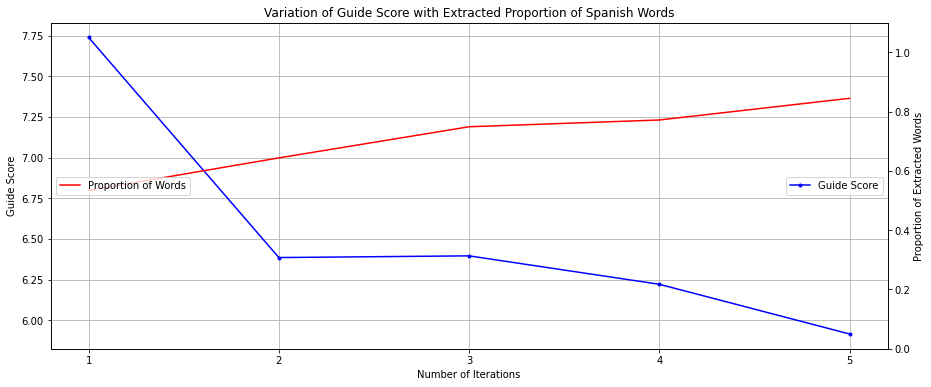

In [ ]:
plot(l1,l2)

In [ ]:
jo2=combine_primitives(jo1,new_ent,fre,string)

1 / 2456 1.9650723934173584
2 / 2456 1.9903326034545898
3 / 2456 1.9784891605377197
4 / 2456 1.9854087829589844
5 / 2456 1.9829463958740234
6 / 2456 1.9726414680480957
7 / 2456 1.9866836071014404
8 / 2456 1.951427936553955
9 / 2456 1.9569222927093506
10 / 2456 2.352651357650757
11 / 2456 1.980459213256836
12 / 2456 1.9561576843261719
13 / 2456 1.9768331050872803
14 / 2456 2.0002169609069824
15 / 2456 1.957275390625
16 / 2456 1.9772729873657227
17 / 2456 2.0020461082458496
18 / 2456 1.9937021732330322
19 / 2456 1.9428391456604004
20 / 2456 1.9552326202392578
21 / 2456 4.122014999389648
22 / 2456 1.9387617111206055
23 / 2456 1.94936203956604
24 / 2456 1.9584932327270508
25 / 2456 2.0117876529693604
26 / 2456 2.049895763397217
27 / 2456 1.9919991493225098
28 / 2456 1.9769654273986816
29 / 2456 1.9845972061157227
30 / 2456 1.9669387340545654
31 / 2456 1.9750895500183105
32 / 2456 1.9833996295928955
33 / 2456 2.0328991413116455
34 / 2456 1.9948160648345947
35 / 2456 1.9710628986358643
36 / 

In [ ]:
jo4=combine_primitives(jo3,new_ent,fre,string) #new

1 / 3083 4.54993200302124
2 / 3083 2.442124128341675
3 / 3083 2.4214425086975098
4 / 3083 2.3998212814331055
5 / 3083 2.4355218410491943
6 / 3083 2.4396512508392334
7 / 3083 2.4033937454223633
8 / 3083 2.430110454559326
9 / 3083 2.4320850372314453
10 / 3083 2.3926475048065186
11 / 3083 2.386918544769287
12 / 3083 2.3988358974456787
13 / 3083 2.380223512649536
14 / 3083 2.400528907775879
15 / 3083 2.4519026279449463
16 / 3083 2.4310691356658936
17 / 3083 2.3746681213378906
18 / 3083 2.4401907920837402
19 / 3083 2.3946638107299805
20 / 3083 2.46500563621521
21 / 3083 2.434858798980713
22 / 3083 2.404038667678833
23 / 3083 2.391742467880249
24 / 3083 2.416853189468384
25 / 3083 2.4511590003967285
26 / 3083 2.438390016555786
27 / 3083 2.422219753265381
28 / 3083 2.394336462020874
29 / 3083 2.395700216293335
30 / 3083 2.392765522003174
31 / 3083 2.418292999267578
32 / 3083 2.407083749771118
33 / 3083 2.9260916709899902
34 / 3083 2.4193341732025146
35 / 3083 2.410308361053467
36 / 3083 2.419

In [ ]:
mores=[]
for i in primi_fre.keys():
  if primi_fre[i]>1:
    mores.append(i)

c=0
for i in set(jo2):
  if i in mores:
    c+=1
print(c/len(set(mores)))
print(c)

0.7625570776255708
167


In [ ]:
f=open('/content/drive/MyDrive/Project/jo2_sp.txt','w+')
for i in jo2:
  f.writelines(i+'\n')
f.close()

In [ ]:
c=pd.read_csv('/content/drive/MyDrive/Project/jo2_sp.txt',names=['List']) 
jo2=list(c['List'])

In [ ]:
print(guide(jo2,string))

[0.000399800099950025, 0.27317268273172685, 3.0036981509245377]


In [ ]:
print(guide(jo2,string))

[0.0, 0.26656671664167914, 2.932233883058471]


In [ ]:
def ent_array(arr,new_ent):
  s=0
  for i in arr:
    s+=new_ent[i]
  return s 

print(ent_array(g,new_ent))


1151.3796531443852


In [ ]:
def leftover(k,string):
    x=0
    d={}
    e={}
    k=sorted(k,key=len,reverse=True)
    i=0
    c=0
    while i<len(string):
        t=0
        for j in k:
            if string[i:len(j)+i]==j:
                t=1
                try:
                    d[len(j)]+=1
                except:
                    d[len(j)]=1
                try:
                    e[j]+=1
                except:
                    e[j]=1
                i=i+len(j)
                break
        if t==0:
            i=i+1
            c=c+1
    
    
    return e

In [ ]:
mores=[]
for i in primi_fre.keys():
  if primi_fre[i]>1:
    mores.append(i)

c=0
for i in set(ro):
  if i in mores:
    c+=1
print(c/len(mores))

0.532967032967033


In [ ]:
f=open('/content/drive/MyDrive/Project/ro_sp_words.txt','w+')
for i in ro:
  f.writelines(i+'\n')
f.close()

In [ ]:
c=pd.read_csv('/content/drive/MyDrive/Project/ro_sp_words.txt',names=['List']) 
ro=list(c['List'])

In [ ]:
left=leftover(ro,string)
ro_mod=[]

for i in set(ro):
  if i in left.keys():
    ro_mod.append(i)

ro1=combine_primitives(ro_mod,fre,string)

1 / 843 0.6957833766937256
2 / 843 0.6951770782470703
3 / 843 0.6997232437133789
4 / 843 0.705650806427002
5 / 843 0.687220573425293
6 / 843 0.6771566867828369
7 / 843 0.6725802421569824
8 / 843 0.6919641494750977
9 / 843 0.7226557731628418
10 / 843 0.6908950805664062
11 / 843 0.6839280128479004
12 / 843 0.6814119815826416
13 / 843 0.6812868118286133
14 / 843 0.6879041194915771
15 / 843 0.6778581142425537
16 / 843 0.6869618892669678
17 / 843 0.6929316520690918
18 / 843 0.6889243125915527
19 / 843 0.6893265247344971
20 / 843 0.690793514251709
21 / 843 0.6653501987457275
22 / 843 0.6924464702606201
23 / 843 0.698744535446167
24 / 843 0.7020359039306641
25 / 843 0.691734790802002
26 / 843 0.6746029853820801
27 / 843 0.6723957061767578
28 / 843 0.6935286521911621
29 / 843 0.6864526271820068
30 / 843 0.6688101291656494
31 / 843 0.7047882080078125
32 / 843 0.6789150238037109
33 / 843 0.7032620906829834
34 / 843 0.686711311340332
35 / 843 0.713463306427002
36 / 843 0.6950435638427734
37 / 843

In [ ]:
mores=[]
for i in primi_fre.keys():
  if primi_fre[i]>1:
    mores.append(i)

c=0
for i in set(ro1):
  if i in mores:
    c+=1
print(c/len(mores))

0.6098901098901099


In [ ]:
f=open('/content/drive/MyDrive/Project/ro1_sp_words.txt','w+')
for i in ro1:
  f.writelines(i+'\n')
f.close()

In [ ]:
left=leftover(ro1,string)
ro1_mod=[]

for i in set(ro1):
  if i in left.keys():
    ro1_mod.append(i)

ro2=combine_primitives(ro1_mod,fre,string)

1 / 1099 0.7936639785766602
2 / 1099 0.8016598224639893
3 / 1099 0.7983777523040771
4 / 1099 0.7861783504486084
5 / 1099 0.7814211845397949
6 / 1099 0.7823324203491211
7 / 1099 0.8027958869934082
8 / 1099 0.7995498180389404
9 / 1099 0.7897486686706543
10 / 1099 0.7888710498809814
11 / 1099 0.8241171836853027
12 / 1099 0.7876894474029541
13 / 1099 0.7929623126983643
14 / 1099 0.7834467887878418
15 / 1099 0.796776294708252
16 / 1099 0.7920205593109131
17 / 1099 0.7950429916381836
18 / 1099 0.7848305702209473
19 / 1099 0.7773408889770508
20 / 1099 0.7778801918029785
21 / 1099 0.7842502593994141
22 / 1099 0.7931890487670898
23 / 1099 0.7665679454803467
24 / 1099 0.7729864120483398
25 / 1099 0.787247896194458
26 / 1099 0.7709555625915527
27 / 1099 0.7883245944976807
28 / 1099 0.7865865230560303
29 / 1099 0.7875211238861084
30 / 1099 0.8014144897460938
31 / 1099 0.770064115524292
32 / 1099 0.7847506999969482
33 / 1099 0.7811074256896973
34 / 1099 0.7952289581298828
35 / 1099 0.78320074081420

In [ ]:
f=open('/content/drive/MyDrive/Project/ro2_sp_words.txt','w+')
for i in ro2:
  f.writelines(i+'\n')
f.close()

In [ ]:
mores=[]
for i in primi_fre.keys():
  if primi_fre[i]>1:
    mores.append(i)

c=0
for i in set(jo2):
  if i in mores:
    c+=1
print(c/len(set(jo2)))

0.05879671832269827


In [ ]:
jo2.remove(np.NaN)

In [ ]:
e=leftover(jo2,string)

mores=[]
for i in primi_fre.keys():
  if primi_fre[i]>1:
    mores.append(i)

c=0
x=set(e.keys()).intersection(set(jo2))
for i in set(jo2):
  if i in mores:
    c+=1
print(c/len(set(x)))

0.10997442455242967


In [ ]:
#Possibilities:
#1. Extract leftovers add to elements and create new set
#2. Leave leftovers proceed with recombining elements
#3. Don't calculate leftovers at all

In [ ]:
f=open('/content/drive/MyDrive/Project/ro1_sp_words.txt','w+')
for i in jo1:
  f.writelines(i+'\n')
f.close()

In [ ]:
mores=[]
for i in primi_fre.keys():
  if primi_fre[i]>1:
    mores.append(i)

c=0
for i in set(ro1):
  if i in mores:
    c+=1
print(c/len(set(ro1)))

0.0715130023640662


In [ ]:
len(ro1)-len(jo1)

-1062